<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#DecisionTree" data-toc-modified-id="DecisionTree-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>DecisionTree</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Random Forest</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение выборки</a></span></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Уменьшение выборки</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics  import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 

In [63]:
df = pd.read_csv('/datasets/Churn.csv') 

In [64]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


В переменной Tenure есть пропуски, нужно их заменить на среднее или медианное значение. Кроме того, переменные  Balance и EstimatedSalary имеют тип float64, возможно нам не нужна такая точность и их можно округлить.

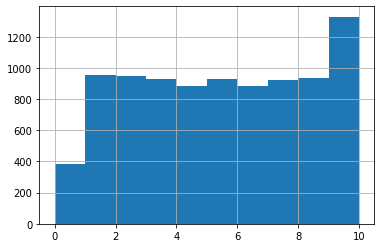

In [66]:
df['Tenure'].hist()

In [67]:
median_tenure = df['Tenure'].median()
df['Tenure'] = df['Tenure'].fillna(median_tenure)
df['Tenure'] = df['Tenure'].astype(int)
df['Balance'] = df['Balance'].astype(int)
df['EstimatedSalary'] = df['EstimatedSalary'].astype(int)

Мы видим много категориальных признаков в наших данных, преобразуем их в численные с помощью метода прямого кодирования, удаляя дополнительный столбец, чтобы избежать дамми-ловушки. Предварительно удалим столбец фамилия, так как фамилия маловероятно влияет на уход из банка, а нам это облегчит преобразование переменных.

In [68]:
df = df.drop(['Surname'], axis=1)
df_ohe = pd.get_dummies(df, drop_first=True)
df_ohe.head(3)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,619,42,2,0,1,1,1,101348,1,0,0,0
1,2,15647311,608,41,1,83807,1,0,1,112542,0,0,1,0
2,3,15619304,502,42,8,159660,3,1,0,113931,1,0,0,0


## Исследование задачи

Посмотрим на баланс классов (ушел/ не ушел из банка) в нашей выборке.

In [69]:
df_ohe['Exited'].mean()

0.2037

Так как ушел обозначается цифрой 1, следовательно только 20% наших наблюдений это клиенты, которые ушли. Таким образом, если бы мы всем клиентам предсказали, что они остануться в банке, то точность такой модели была бы 80%.

Разделим данные в пропорции 60, 20, 20 на тренировочную, валидационную и тестувую выборку соответственно.Сделаем стратификацию, чтобы было почти одинаковое число 1 в каждой выборке.

In [70]:
features = df_ohe.drop(['Exited'], axis =1)
target = df_ohe['Exited']

features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.2, random_state=12345,stratify=target)

features_train, features_valid, target_train, target_valid = train_test_split(
    features_train, target_train, test_size=0.25, random_state=12345, stratify=target_train)

In [71]:
print(len(features))
print(len(features_train)+len(features_test)+len(features_valid))

10000
10000


In [72]:
print(target_test.mean())
print(target_train.mean())
print(target_valid.mean())

0.2035
0.20383333333333334
0.2035


### DecisionTree

In [73]:
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
accuracy_score(target_valid,predicted_valid)

0.7975

Точность нашей дефолтной модели ниже, чем даже если бы мы просто предсказывали, что все клиенты остануться в банке. Попробуем найти более оптимальные гиперпараметры для нее.

In [74]:
frames_features = [features_train,features_valid ]
frames_target = [target_train,target_valid ]
train_val_features = pd.concat(frames_features)
train_val_target = pd.concat(frames_target)

In [75]:
parametrs = {'criterion': ['gini', 'entropy'], 'max_depth': range(1,20)}

In [76]:
GridSearchCV_tree = GridSearchCV(model, parametrs, cv=5)
GridSearchCV_tree.fit(train_val_features, train_val_target)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=12345,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 20)},
             pre_dispat

In [77]:
GridSearchCV_tree.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [78]:
best_tree_model = GridSearchCV_tree.best_estimator_
predictions_tree = best_tree_model.predict(features_test)
accuracy_score(target_test,predictions_tree)

0.857

Боллее оптимальные параметры помогли нам улучшить accuracy нашей модели до 85. Но как мы знаем, accuracy не самая лучшая метрика качества модели. Для лучшего понимания, как работает наша модель посчитаем для нее матрицу путаницы и  метрики precision(точность) и recall(полнота). 

In [79]:
confusion_matrix(target_test, predictions_tree)

array([[1532,   61],
       [ 225,  182]])

In [80]:
precision_score(target_test, predictions_tree)

0.7489711934156379

In [81]:
recall_score(target_test, predictions_tree)

0.44717444717444715

In [82]:
f1_score_tree = f1_score(target_test,predictions_tree)

F1-мера ниже нужного нам значения. Мы видим, что возможно это происходит из-за того, что полнота нашей модели достаточно низкая, то есть не всех клиентов, которые собираются уйти из банка мы правильно определяем. А мы помним, что нам самое главное для нас в этой задаче предотвратить уход клиентов, то есть нам не так страшно совершить false positive ошибку, чем false negative.Посмотрим как расспределены вероятности внутри нашей модели.

In [83]:
target_predicted_probability = best_tree_model.predict_proba(features_test)

Text(0, 0.5, 'Number of observations')

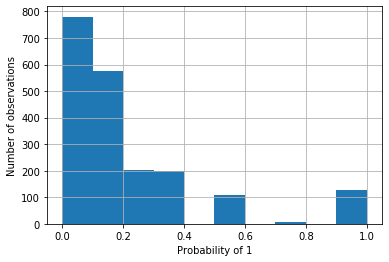

In [84]:
ax = pd.Series(target_predicted_probability[ :, 1]).hist()
ax.set_xlabel('Probability of 1')
ax.set_ylabel('Number of observations')

Можно изменить строгость критерия принятия решения о предсказании ухода клиента до 0,3 и посмотреть как это повлияет на f1-меру.

In [85]:
predictions_new =np.where(target_predicted_probability[ :, 1] > 0.3, 1, 0)

In [86]:
f1_score_tree_thr=f1_score(target_test,predictions_new)

In [87]:
roc_auc_score_tree = roc_auc_score(target_test, best_tree_model.predict_proba(features_test)[:, 1])

В результате подбора подходящих гиперпараметров и изменения строгости принятия решения об отнесении к 1 классу нам удалось довести f1-меру до 0.61. Однако мы помним, что возможно наша модель плохо обучается из-за несбалансированности классов.

Изучем значение ROC-AUC для наших моделей.

In [88]:
#Лучшая модель дерева решений
probabilities_one = target_predicted_probability[:, 1]
roc_auc_score_tree_thr = roc_auc_score(target_test, best_tree_model.predict_proba(features_test)[:, 1])

### Random Forest

In [89]:
model_forest = RandomForestClassifier(random_state=0)

In [90]:
parametrs = {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_depth': [1, 3, 5, 7, 9, 11], 'min_samples_leaf': [1,2,3, 5,7], 'min_samples_split': [2, 4, 6, 8]}

In [91]:
from sklearn.model_selection import GridSearchCV
GridSearchCV_rf = GridSearchCV(model_forest, parametrs, cv=3)
GridSearchCV_rf.fit(train_val_features, train_val_target)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'m

In [92]:
GridSearchCV_rf.best_params_

{'max_depth': 11,
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'n_estimators': 30}

In [93]:
best_forest_model = GridSearchCV_rf.best_estimator_

In [94]:
predictions_valid_forest = best_forest_model.predict(features_valid)
accuracy_score(target_valid,predictions_valid_forest)

0.899

In [95]:
f1_score_forest = f1_score(target_test, predictions_valid_forest)
f1_score_forest

0.12307692307692307

In [96]:
roc_auc_score_forest = roc_auc_score(target_test, best_forest_model.predict_proba(features_test)[:, 1])

## Борьба с дисбалансом

### Взвешивание классов

Попробуем вначале использовать алгоритм логистической регрессии, так как у него есть аргумент class_weight и мы можем указать, что нам необходмо сбалансировать вес классов.

In [97]:
model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
f1_score(target_valid, predicted_valid)

0.5039647577092511

К сожалению, f1-мера ниже нужного нам значения.

### Увеличение выборки

In [98]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [99]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 10)
model_log_up = LogisticRegression(solver='liblinear', random_state=12345) 
model_log_up.fit(features_upsampled,target_upsampled)
predicted_valid = model_log_up.predict(features_valid)
f1_score(target_valid, predicted_valid)

0.3381803074366431

In [100]:
model_tree_up = DecisionTreeClassifier(criterion = 'gini', max_depth= 5, random_state=12345) 
model_tree_up .fit(features_upsampled,target_upsampled)
predicted_valid = model_tree_up .predict(features_valid)
f1_score(target_valid, predicted_valid)

0.4899653979238754

### Уменьшение выборки

In [101]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled


In [102]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 10)
model_log_down = LogisticRegression(solver='liblinear', random_state=12345) 
model_log_down.fit(features_downsampled,target_downsampled)
predicted_valid = model_log_down.predict(features_valid)
f1_score_log_up = f1_score(target_valid, predicted_valid)
f1_score_log_up

0.3381803074366431

In [103]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.1)
model_tree_down = DecisionTreeClassifier(criterion = 'gini', max_depth= 5, random_state=12345) 
model_tree_down.fit(features_downsampled,target_downsampled)
predicted_valid = model_tree_down.predict(features_valid)
f1_score_log_down = f1_score(target_valid, predicted_valid)
f1_score_log_down

0.49118046132971505

Уменьшение и увеличение выборки нам не очень помогло ни для логистической регрессии, ни для дерева решений. 

In [104]:
#Логистическая регрессия с уменьшением выборки
roc_auc_score_log_down = roc_auc_score(target_test, model_log_down.predict_proba(features_test)[:, 1])

In [105]:
#Логистическая регрессия с увеличением выборки
roc_auc_score_log_ups =roc_auc_score(target_test, model_log_up.predict_proba(features_test)[:, 1])

## Тестирование модели

Лучший результат показала модель с подобранными гиперпараметрами и уменьшиным порогом классификации.

In [106]:
best_tree_model = GridSearchCV_tree.best_estimator_
target_predicted_probability = best_tree_model.predict_proba(features_test)
predictions_new =np.where(target_predicted_probability[ :, 1] > 0.3, 1, 0)
f1_score(target_test,predictions_new)

0.6188235294117648

Построим график для нашей ROC кривой, чтобы посмотреть насколько наша модель хорошо справляется с задачей.

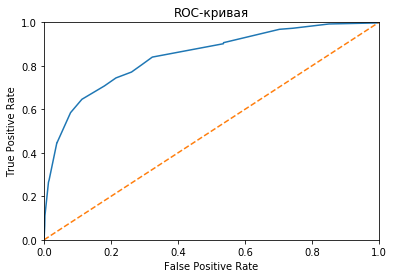

In [107]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one)
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

Посмотрим для интереса какие переменные больше всего важны для нашей итоговой модели.

In [108]:
features_importance = best_tree_model.feature_importances_
features_importance_df = pd.DataFrame({'features': list(features_test),
                                       'features_importance': features_importance})
features_importance_df.sort_values('features_importance', ascending=False).head(5)

,features,features_importance
3,Age,0.432600
6,NumOfProducts,0.329160
8,IsActiveMember,0.145606
5,Balance,0.047679
10,Geography_Germany,0.021908


Самыми важными переменными для нашей лучшей модели оказались возраст и число продуктов, которыми пользуется клиент.

### Вывод
Мы нашли оптимальную модель для наших данных, это оказалась модель дерева решений с подобранными для нее оптимальными гиперпараметрами и с уменьшиным до 0.3 порогом классификации. Такая модель смогла обеспечить нам f1-меру равную 0.618, а AUC-ROC равную 0.84. Самыми важными переменными для этой модели оказались возраст и число продуктов, которыми пользуется клиент.

In [109]:
models_info = pd.DataFrame(columns = ['model_type', 'f1_test',  'auc-roc'])
models_info.loc[0, 'model_type'] = 'DecisionTree'
models_info.loc[0, 'f1_test'] = f1_score_tree
models_info.loc[0, 'auc-roc'] = roc_auc_score_tree
models_info.loc[1, 'model_type'] = 'DecisionTree_thr'
models_info.loc[1, 'f1_test'] = f1_score_tree_thr
models_info.loc[1, 'auc-roc'] = roc_auc_score_tree_thr 
models_info.loc[2, 'model_type'] = 'RandomForest'
models_info.loc[2, 'f1_test'] = f1_score_forest
models_info.loc[2, 'auc-roc'] = roc_auc_score_forest
models_info.loc[3, 'model_type'] = 'LogRegDow'
models_info.loc[3, 'f1_test'] = f1_score_log_down
models_info.loc[3, 'auc-roc'] = roc_auc_score_log_down
models_info.loc[4, 'model_type'] = 'LogRegUp'
models_info.loc[4, 'f1_test'] = f1_score_log_up
models_info.loc[4, 'auc-roc'] = roc_auc_score_log_ups 
models_info

,model_type,f1_test,auc-roc
0,DecisionTree,0.56,0.843764
1,DecisionTree_thr,0.618824,0.843764
2,RandomForest,0.123077,0.865374
3,LogRegDow,0.49118,0.589065
4,LogRegUp,0.33818,0.597008


## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*